# One Hidden Layer NN for the MNIST data set using only numpy
#### with 64 node, it got accuracy of 91% 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:

num_hidden_nodes = 64
learning_rate = 0.2

def init_params():
    W1 = np.random.rand(num_hidden_nodes, 784) - 0.5
    b1 = np.random.rand(num_hidden_nodes, 1) - 0.5
    W2 = np.random.rand(10, num_hidden_nodes) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def backward_prop2(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dL_dy = A2 - one_hot_Y
    
    ##
    dL_dW2 = 1/m * dL_dy.dot(A1.T)
    dL_db2 = 1/m * np.sum(dL_dy)
    
    ##
    dL_dz1 = W2.T.dot(dL_dy) * ReLU_deriv(Z1)
    dL_dW1 = 1/m * dL_dz1.dot(X.T)
    dL_db1 = 1/m * np.sum(dL_dz1)
    return dL_dW1, dL_db1, dL_dW2, dL_db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
#     print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Batch gradient descent
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop2(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [5]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, learning_rate, 500)

Iteration:  0
0.10192682926829268
Iteration:  10
0.5167804878048781
Iteration:  20
0.6640487804878049
Iteration:  30
0.7278536585365853
Iteration:  40
0.7641219512195122
Iteration:  50
0.788829268292683
Iteration:  60
0.8069268292682927
Iteration:  70
0.8200243902439024
Iteration:  80
0.8307317073170731
Iteration:  90
0.8387560975609756
Iteration:  100
0.8473658536585366
Iteration:  110
0.8530975609756097
Iteration:  120
0.8584146341463414
Iteration:  130
0.8628048780487805
Iteration:  140
0.8669756097560976
Iteration:  150
0.8708292682926829
Iteration:  160
0.8744634146341463
Iteration:  170
0.8777073170731707
Iteration:  180
0.8799512195121951
Iteration:  190
0.883
Iteration:  200
0.8855121951219512
Iteration:  210
0.8875853658536585
Iteration:  220
0.8899756097560976
Iteration:  230
0.8921707317073171
Iteration:  240
0.894219512195122
Iteration:  250
0.8962682926829268
Iteration:  260
0.8975609756097561
Iteration:  270
0.8991951219512195
Iteration:  280
0.9006341463414634
Iteration:

In [6]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label:       ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:        4


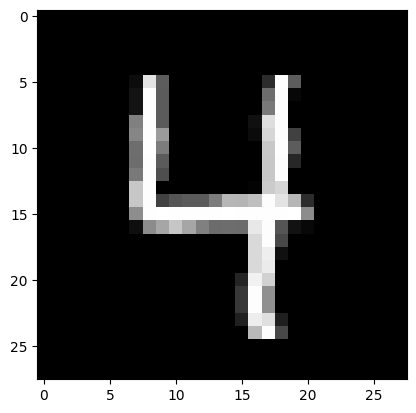

Prediction:  [9]
Label:        7


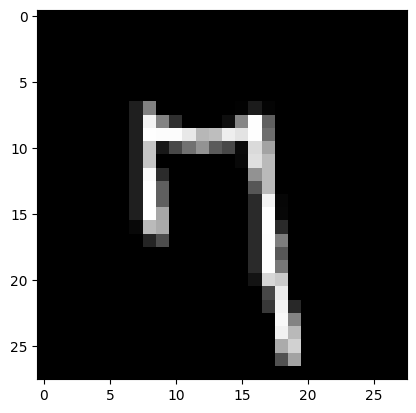

Prediction:  [8]
Label:        8


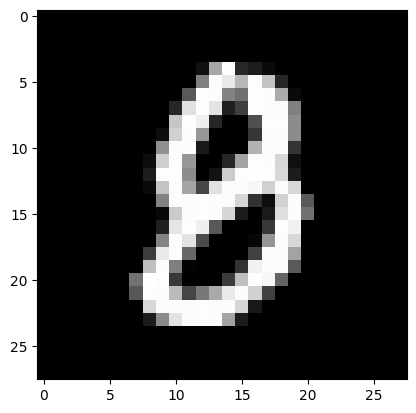

Prediction:  [2]
Label:        2


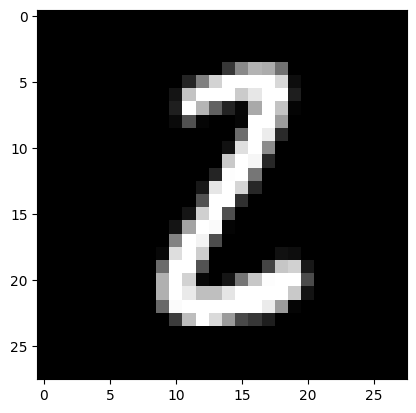

Prediction:  [0]
Label:        0


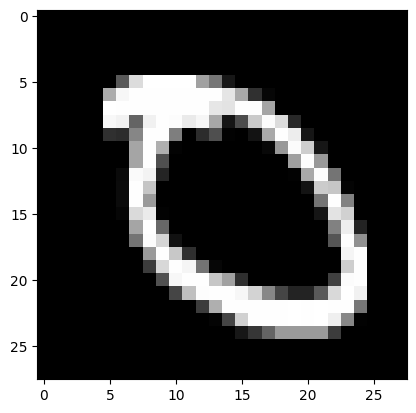

Prediction:  [6]
Label:        6


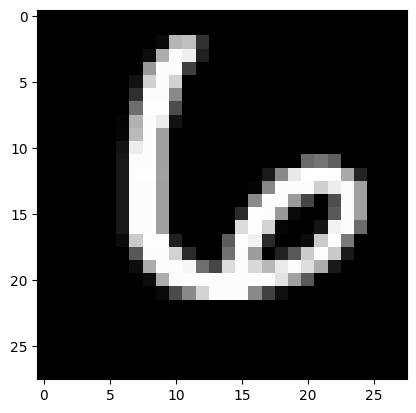

Prediction:  [9]
Label:        5


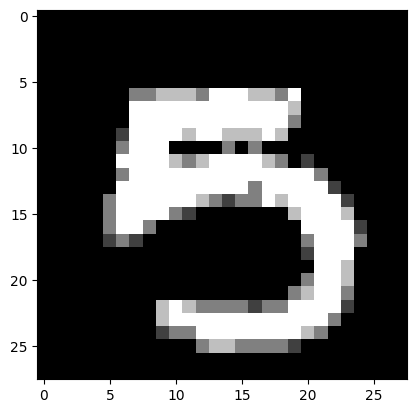

Prediction:  [7]
Label:        7


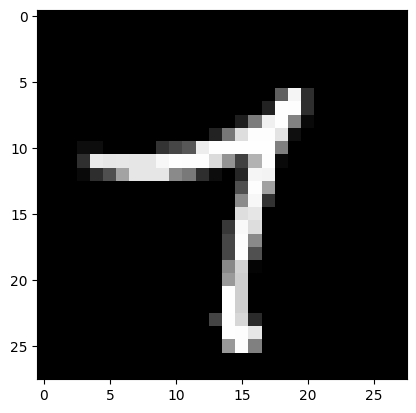

Prediction:  [5]
Label:        5


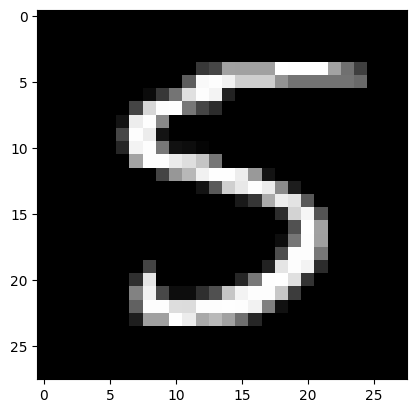

Prediction:  [9]
Label:        9


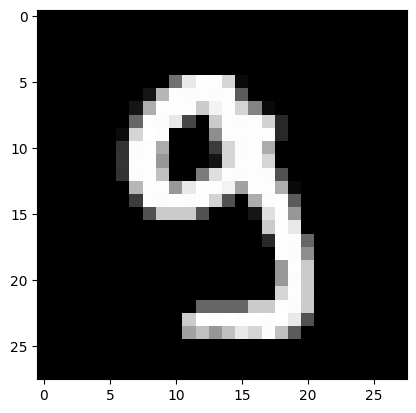

In [7]:
# test_prediction(0, W1, b1, W2, b2)
# test_prediction(1, W1, b1, W2, b2)
# test_prediction(2, W1, b1, W2, b2)
# test_prediction(3, W1, b1, W2, b2)
# test_prediction(4, W1, b1, W2, b2)
# test_prediction(5, W1, b1, W2, b2)
# test_prediction(6, W1, b1, W2, b2)
# test_prediction(7, W1, b1, W2, b2)
# test_prediction(8, W1, b1, W2, b2)
# test_prediction(9, W1, b1, W2, b2)
# test_prediction(10, W1, b1, W2, b2)
for i in range(10):
    test_prediction(int(np.round(100 * (np.random.rand()))%m), W1, b1, W2, b2)